In [1]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import cmocean.cm as cm
from IPython import display

In [2]:
# xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_chem_T.nc')

In [3]:
xr.open_dataset('01mar23_fix/SalishSea_1d_20230401_20230401_graz_T.nc')

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-04-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/17)
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    ...                    ...
    GRMESZPON             (time_counter, deptht, y, x) float32 ...
    GRMESZMICZ            (time_counter, deptht, y, x) float32 ...
    GRMICZDIAT            (time_counter, deptht, y, x) float32 ...
    GRMICZPHY             (time_counter, deptht, y, x) float32 ...
    GRMICZPON             (time_counter, deptht, y, x) float32 ...
    GRMICZMICZ            (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20230401_20230401_graz_T
    description:  grazing and mortality
    title:        grazing and mortality
    Conventions:  CF-1.6
    timeStamp:    2023-May-26 00:01:30 GMT
    uuid:         8a2716d5-9a11-4dc9-9e8d-20f9c8426b43

In [4]:
xr.open_dataset('01mar23_fix/SalishSea_1d_20230401_20230401_prod_T.nc')

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-04-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    PPDIAT                (time_counter, deptht, y, x) float32 ...
    PPPHY                 (time_counter, deptht, y, x) float32 ...
    PPDIATNO3             (time_counter, deptht, y, x) float32 ...
    PPPHYNO3              (time_counter, deptht, y, x) float32 ...
    TQ10                  (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20230401_20230401_prod_T
    description:  biology growth rates
    title:        biology growth rates
    Conventions:  CF-1.6
    timeStamp:    2023-May-26 00:01:26 GMT
    uuid:         db06abd0-6df7-4961-afc7-61a470b670e7

In [5]:
# xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_biol_T.nc')

In [6]:
chem = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_chem_T.nc')

In [7]:
phys = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_grid_T.nc')
phys_new = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_grid_T_new.nc')
phys_fix = xr.open_dataset('01mar23_fix/SalishSea_1h_20230301_20230301_grid_T.nc')
phys_keys = xr.open_dataset('01mar23_newkeys/SalishSea_1h_20230301_20230301_grid_T.nc')
phys_keys07 = xr.open_dataset('01mar23_newkeys07/SalishSea_1h_20230301_20230301_grid_T.nc')
phys_rivers = xr.open_dataset('01mar23_riv_outputs/SalishSea_1h_20230301_20230301_grid_T.nc')
phys_rivers02 = xr.open_dataset('01mar23_riv_outputs02/SalishSea_1h_20230301_20230301_grid_T.nc')
phys_rivers03 = xr.open_dataset('01mar23_riv_outputs03/SalishSea_1h_20230301_20230301_grid_T.nc')
phys_rivers04 = xr.open_dataset('01mar23_riv_outputs04/SalishSea_1h_20230301_20230301_grid_T.nc')

In [8]:
fw_rivers = xr.open_dataset('01mar23_riv_outputs/SalishSea_1h_20230301_20230301_rivr_T.nc')
fw_rivers02 = xr.open_dataset('01mar23_riv_outputs02/SalishSea_1h_20230301_20230301_rivr_T.nc')
fw_rivers03 = xr.open_dataset('01mar23_riv_outputs03/SalishSea_1h_20230301_20230301_rivr_T.nc')
fw_rivers04 = xr.open_dataset('01mar23_riv_outputs04/SalishSea_1h_20230301_20230301_rivr_T.nc')

In [9]:
uvels = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_grid_U.nc')

In [10]:
vvels = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_grid_V.nc')

In [11]:
wvels = xr.open_dataset('01mar23_fix/SalishSea_1h_20230401_20230401_grid_W.nc')

In [12]:
# /results2/SalishSea/nowcast-green.202111/01mar23
# SalishSea_1d_20230301_20230301_prod_T.nc
phys_old = xr.open_dataset('../../../../../../../../results2/SalishSea/nowcast-green.202111/01mar23/SalishSea_1h_20230301_20230301_grid_T.nc')

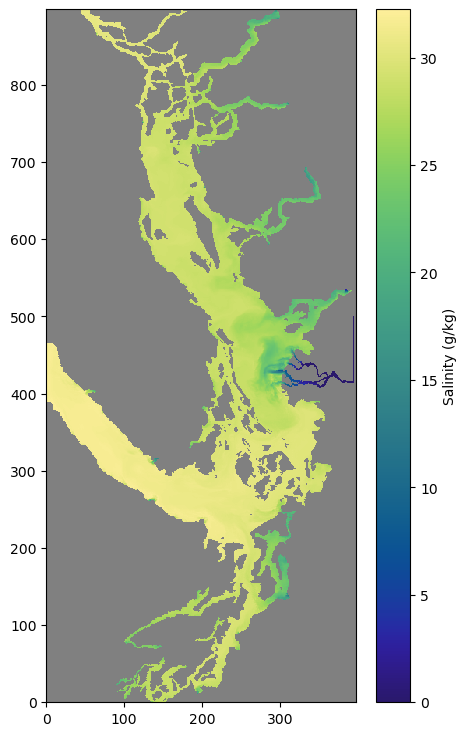

In [13]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

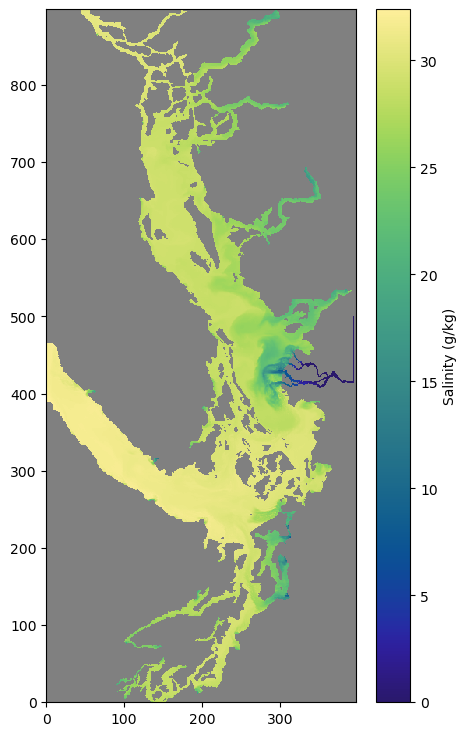

In [14]:
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

In [15]:
# tstep = 23

# cmap = mpl.colormaps['RdBu']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 9))
# salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys.vosaline[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Salinity Old - Salinity Our Run (g/kg)')

Text(0.5, 1.0, 'Timestep = 23')

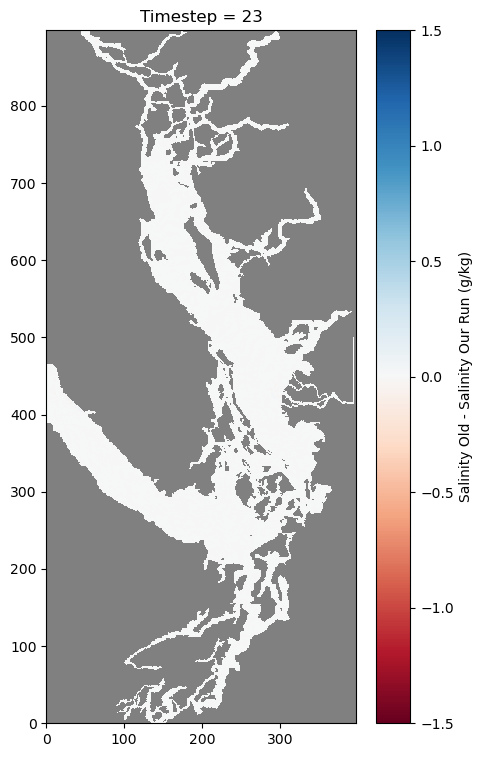

In [16]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_fix.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5,vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

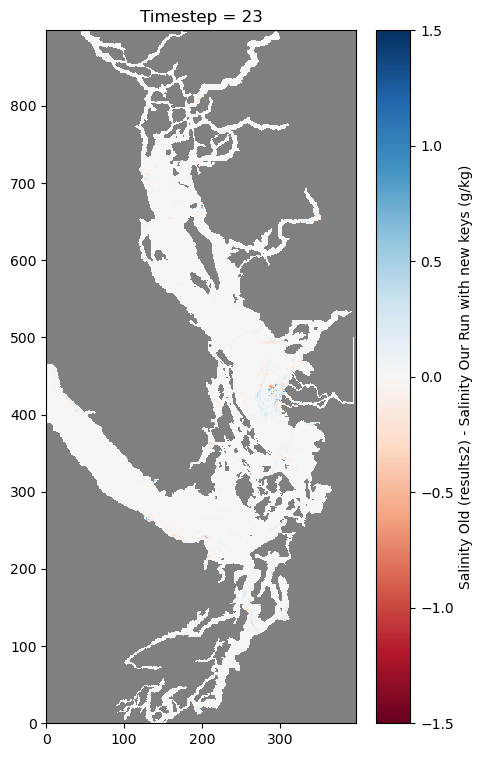

In [17]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_keys.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old (results2) - Salinity Our Run with new keys (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

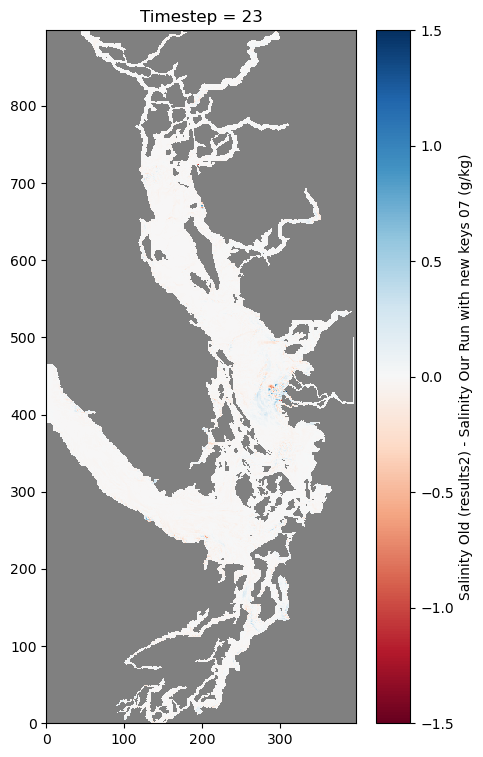

In [18]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_keys07.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old (results2) - Salinity Our Run with new keys 07 (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

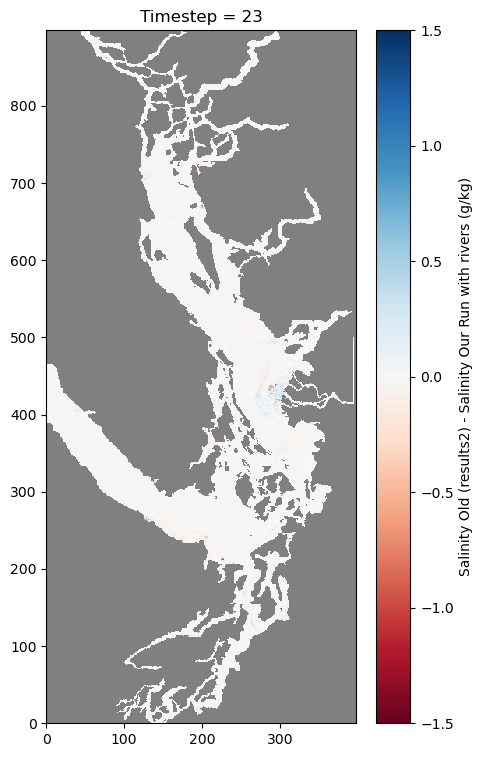

In [19]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_rivers.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old (results2) - Salinity Our Run with rivers (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

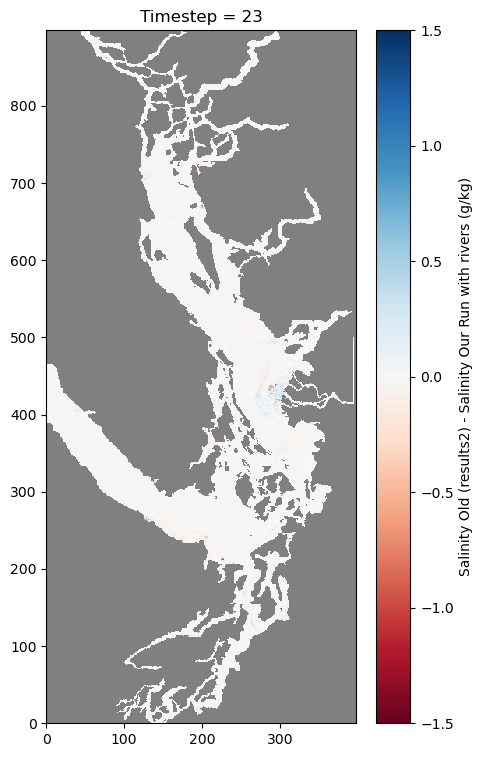

In [20]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_rivers03.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1.5, vmax=1.5)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old (results2) - Salinity Our Run with rivers (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

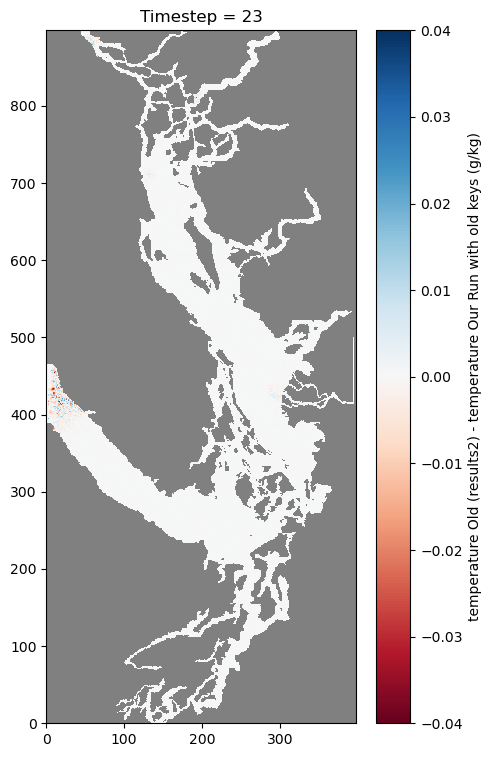

In [21]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_fix.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-0.04, vmax=0.04)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with old keys (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

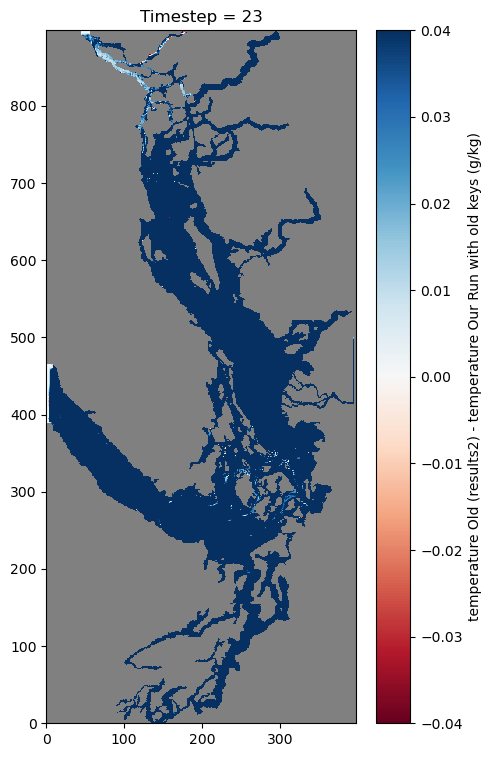

In [22]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_rivers04.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-0.04, vmax=0.04)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with old keys (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

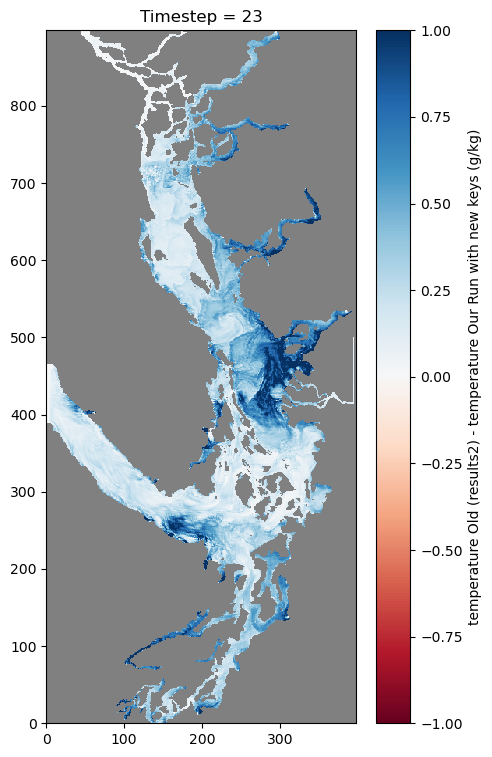

In [23]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_keys.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with new keys (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

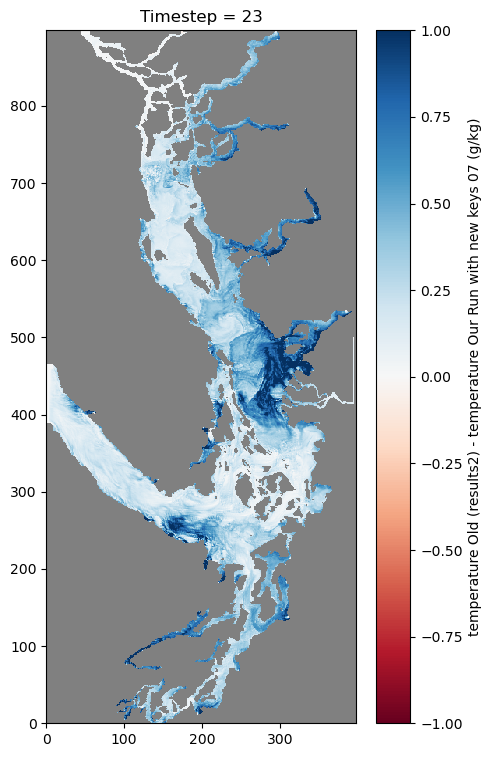

In [24]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_keys07.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with new keys 07 (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

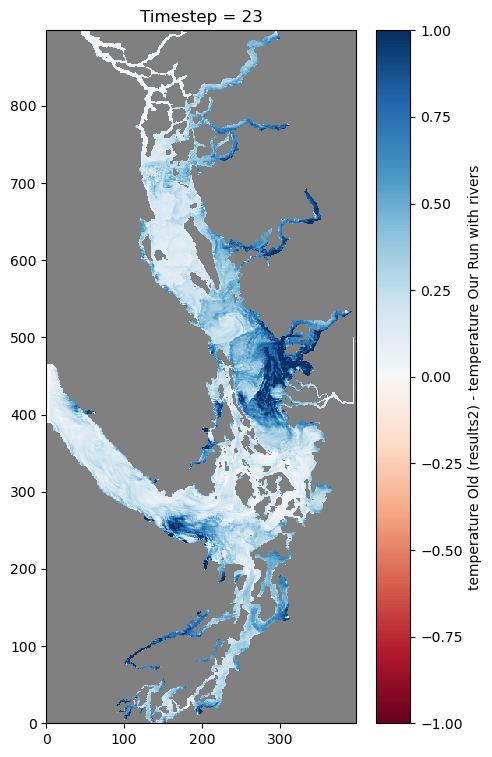

In [25]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_rivers.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with rivers')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

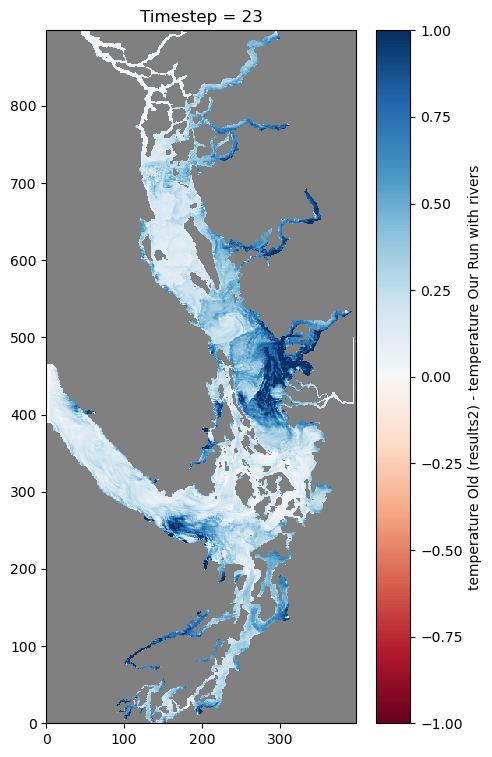

In [26]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_rivers03.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with rivers')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

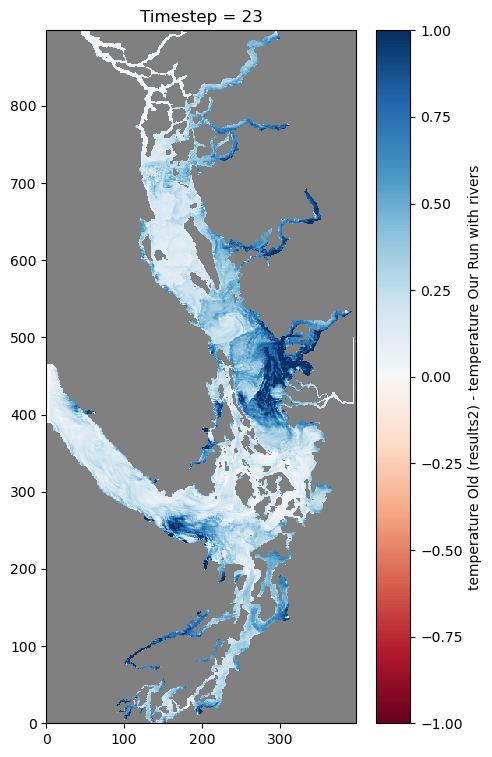

In [27]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
temperature = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_rivers04.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(temperature, cmap=cmap, vmin=-1, vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('temperature Old (results2) - temperature Our Run with rivers')
ax.set_title('Timestep = {}'.format(str(tstep)))

## Rivers

In [28]:
import salishsea_tools.river_202108 as rivers

In [29]:
def river_box(w_shed, r_call, box_side):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    return river_range

In [30]:
box_size = 30
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [31]:
Puntledge

[624, 684, 90, 150]

(90.0, 150.0)

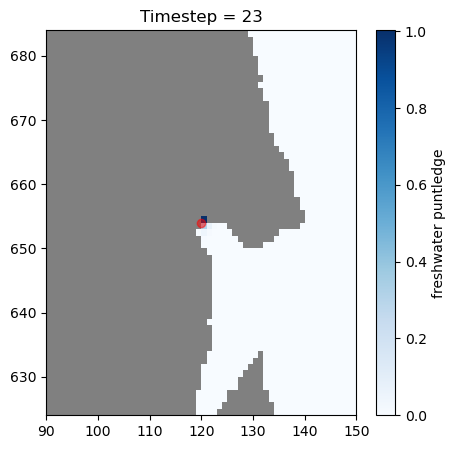

In [62]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers04.puntledge_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater puntledge')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['evi_s']['Puntledge']['j'],rivers.prop_dict['evi_s']['Puntledge']['i'],color='r', alpha = 0.5)
ax.set_ylim(Puntledge[0], Puntledge[1])
ax.set_xlim(Puntledge[2], Puntledge[3])

# ax.set_ylim(650, 750)
# ax.set_xlim(80, 180)

(105.0, 205.0)

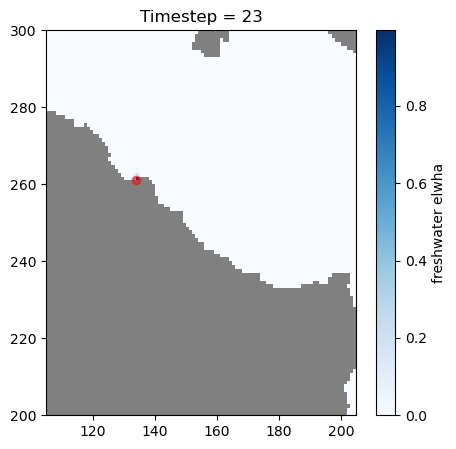

In [63]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers04.elwha_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater elwha')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['jdf']['Elwha']['j'],rivers.prop_dict['jdf']['Elwha']['i'],color='r', alpha = 0.5)
ax.set_ylim(Elwha[0], Elwha[1])
ax.set_xlim(Elwha[2], Elwha[3])

ax.set_ylim(200, 300)
ax.set_xlim(105, 205)

(180.0, 240.0)

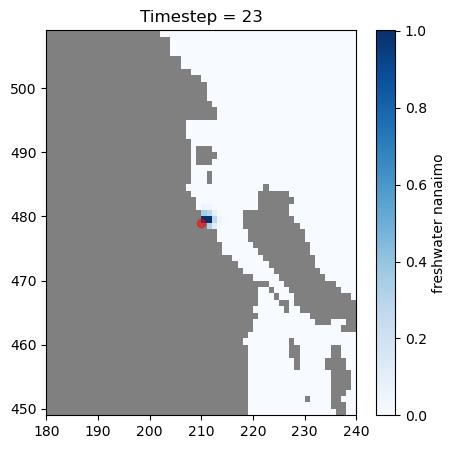

In [64]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers04.nanaimo_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nanaimo')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['evi_s']['Nanaimo1']['j'],rivers.prop_dict['evi_s']['Nanaimo1']['i'],color='r', alpha = 0.5)
ax.set_ylim(Nanaimo[0], Nanaimo[1])
ax.set_xlim(Nanaimo[2], Nanaimo[3])

(105.0, 165.0)

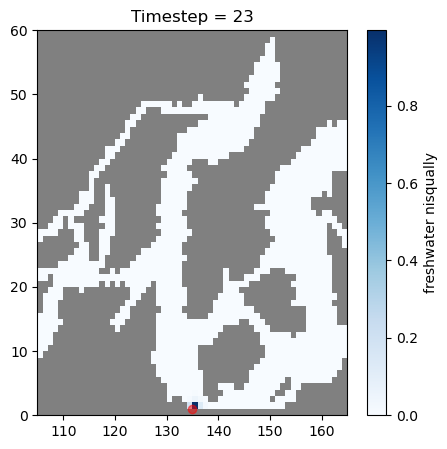

In [65]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers04.nisqually_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater nisqually')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['puget']['NisquallyMcAllister']['j'],rivers.prop_dict['puget']['NisquallyMcAllister']['i'],color='r', alpha = 0.5)
ax.set_ylim(Nisqually[0], Nisqually[1])
ax.set_xlim(Nisqually[2], Nisqually[3])

(368.0, 398.0)

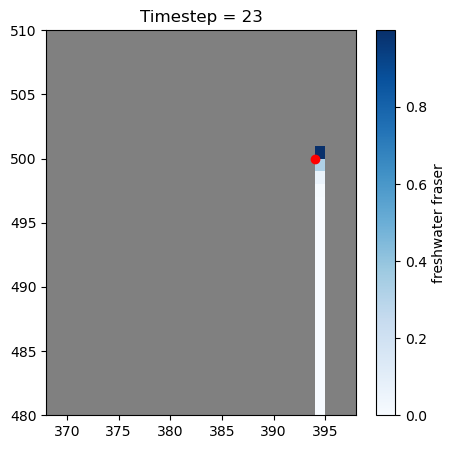

In [58]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers04.fraser_river[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater fraser')
ax.set_title('Timestep = {}'.format(str(tstep)))
ax.scatter(rivers.prop_dict['fraser']['Fraser']['j'],rivers.prop_dict['fraser']['Fraser']['i'],color='r')
ax.set_ylim(480, 510)
ax.set_xlim(368, 398)

Text(0.5, 1.0, 'Timestep = 23')

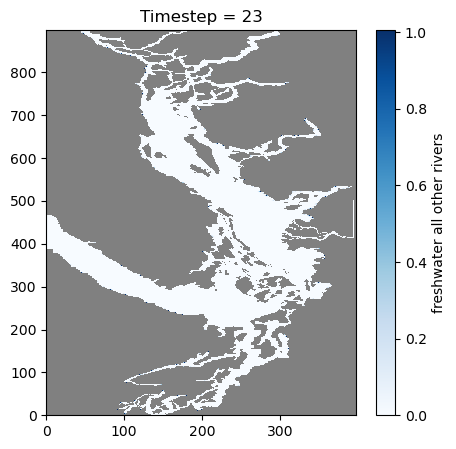

In [59]:
tstep = 23

cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
freshwater = np.ma.masked_array(fw_rivers04.other_rivers[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(freshwater, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('freshwater all other rivers')
ax.set_title('Timestep = {}'.format(str(tstep)))

In [35]:
fw_rivers04.nanaimo_river

<xarray.DataArray 'nanaimo_river' (time_counter: 24, deptht: 40, y: 898, x: 398)>
[343107840 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
  * deptht         (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2023-03-01T00:30:00 ... 2023...
Dimensions without coordinates: y, x
Attributes:
    long_name:           Nanaimo River
    units:               1
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area

In [36]:
fw_rivers04

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-03-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/19)
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    ...                    ...
    puntledge_river       (time_counter, deptht, y, x) float32 ...
    salmon_river          (time_counter, deptht, y, x) float32 ...
    homathko_river        (time_counter, deptht, y, x) float32 ...
    squamish_river        (time_counter, deptht, y, x) float32 ...
    fraser_river          (time_counter, deptht, y, x) float32 ...
    other_rivers          (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20230301_20230301_rivr_T
    description:  river tracers
    title:        river tracers
    Conventions:  CF-1.6
    timeStamp:    2023-Jul-18 15:51:25 GMT
    uuid:         d1dbb458-ba20-46e6-9e24-f0ddc075a8ee

In [37]:
np.count_nonzero(np.nan_to_num(fw_rivers04.skagit_river.to_numpy(), nan=0.0))
# nonzero: Elwha, Nanaimo, Puntledge, other rivers

79636